In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_data\merge_frame.csv')

In [3]:
df_cust = pd.read_excel('dataset\CustomersData.xlsx')

In [4]:
df.head(1)

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,transaction_month,coupon_code,discount_pct,gst,offline_spend,online_spend,invoice_value,acquisition_month,tax_paid,total_markerting_exp
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,0.1,0.1,4500,2424.5,158.6729,1,15.371,6924.5


In [5]:
df_cust.columns = df_cust.columns.str.lower()

In [6]:
RFM_merge = df.merge(df_cust,how='left',on=['customerid'])

Customer Segmentation
RFM – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.


SInce this data set if from 2019-01-01 to 2019-12-31

assuming we are conducting this RFM analysis on 2020-01-01

The formula for calculating recency:
Recency = Current Date - Last Purchase Date

In [7]:
RFM_merge['transaction_date'] = pd.to_datetime(RFM_merge['transaction_date'])

In [8]:
filter_recency = RFM_merge.groupby('customerid')['transaction_date'].max().to_frame().reset_index()

In [29]:
filter_recency

,customerid,transaction_date,recency,recency_scaled
0,12346,2019-09-15,108 days,2.0
1,12347,2019-11-02,60 days,2.0
2,12348,2019-10-19,74 days,2.0
3,12350,2019-12-14,18 days,1.0
4,12356,2019-09-15,108 days,2.0
...,...,...,...,...
1463,18259,2019-04-05,271 days,4.0
1464,18260,2019-10-05,88 days,2.0
1465,18269,2019-06-20,195 days,3.0
1466,18277,2019-10-23,70 days,2.0


In [9]:
current_date = pd.to_datetime('2020-01-01')

In [10]:
filter_recency['recency'] = current_date - filter_recency['transaction_date']

In [11]:
min_val = filter_recency['recency'].min()
max_val = filter_recency['recency'].max()
filter_recency['recency_scaled'] = [((filter_recency['recency'][i] - min_val) / (max_val - min_val) * (5-1) +1).__round__(0) for i in range(len(filter_recency['recency']))]

In [12]:
filter_recency

,customerid,transaction_date,recency,recency_scaled
0,12346,2019-09-15,108 days,2.0
1,12347,2019-11-02,60 days,2.0
2,12348,2019-10-19,74 days,2.0
3,12350,2019-12-14,18 days,1.0
4,12356,2019-09-15,108 days,2.0
...,...,...,...,...
1463,18259,2019-04-05,271 days,4.0
1464,18260,2019-10-05,88 days,2.0
1465,18269,2019-06-20,195 days,3.0
1466,18277,2019-10-23,70 days,2.0


c:\Users\Mohdd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


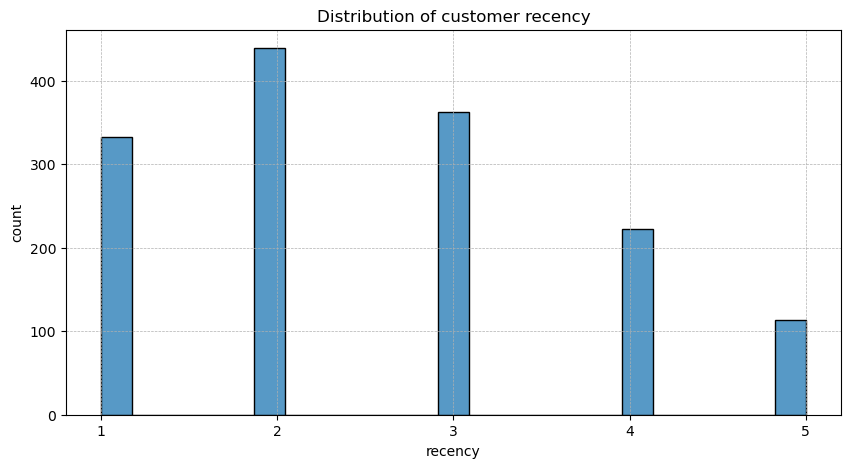

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data=filter_recency,x=filter_recency['recency_scaled'].astype(int))
plt.xlabel('recency')
plt.ylabel('count')
plt.title('Distribution of customer recency')
plt.xticks(range(1, 6))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
plt.show()

the formula for calculating frequency:

Frequency = Total Number of Transactions

For example, if a customer made 5 purchases within the past year, their frequency value would be 5.

In [14]:
filter_frequency = RFM_merge.groupby('customerid')['transaction_id'].count().to_frame(name='frequency').reset_index()

In [15]:
min_val = filter_frequency['frequency'].min()
max_val = filter_frequency['frequency'].max()
filter_frequency['frequency_scaled'] = [((filter_frequency['frequency'][i] - min_val) / (max_val - min_val) * (5-1) +1).__round__(0) for i in range(len(filter_frequency['frequency']))]

In [16]:
filter_frequency

,customerid,frequency,frequency_scaled
0,12346,2,1.0
1,12347,60,1.0
2,12348,23,1.0
3,12350,17,1.0
4,12356,36,1.0
...,...,...,...
1463,18259,7,1.0
1464,18260,40,1.0
1465,18269,8,1.0
1466,18277,1,1.0


c:\Users\Mohdd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


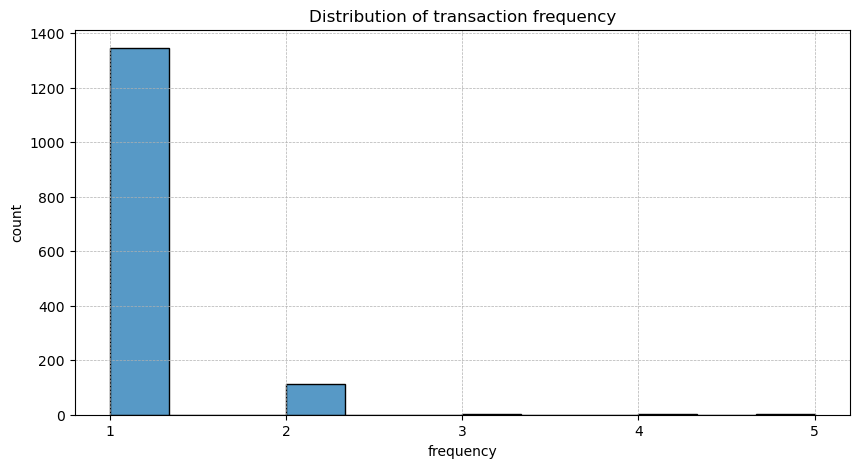

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(data=filter_frequency,x=filter_frequency['frequency_scaled'].astype(int))
plt.xlabel('frequency')
plt.ylabel('count')
plt.title('Distribution of transaction frequency')
plt.xticks(range(1, 6))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
plt.show()

the formula for calculating monetary value:

Monetary Value = sum(Transaction Value)

In [18]:
filter_monetary_value = RFM_merge.groupby('customerid')['invoice_value'].sum().to_frame(name='monetary_value').reset_index()

In [19]:
filter_monetary_value['monetary_value'] = filter_monetary_value['monetary_value'].round(0).astype(int)

In [20]:
min_val = filter_monetary_value['monetary_value'].min()
max_val = filter_monetary_value['monetary_value'].max()
filter_monetary_value['monetary_value_scaled'] = [((filter_monetary_value['monetary_value'][i] - min_val) / (max_val - min_val) * (5-1) +1).__round__(0) for i in range(len(filter_monetary_value['monetary_value']))]

RFM Score:

In [21]:
RFM_score_frame = filter_recency[['customerid','recency_scaled']].merge(filter_frequency[['customerid','frequency_scaled']],'left',on=['customerid']).merge(filter_monetary_value[['customerid','monetary_value_scaled']],'left',on=['customerid'])

In [22]:
RFM_score_frame['RFM_score'] = (RFM_score_frame['recency_scaled'].astype(int).astype(str) + RFM_score_frame['frequency_scaled'].astype(int).astype(str) +RFM_score_frame['monetary_value_scaled'].astype(int).astype(str)).astype(int)

Top 10 highest value customers

In [23]:
RFM_score_frame.sort_values('RFM_score',ascending=False).head(10)

,customerid,recency_scaled,frequency_scaled,monetary_value_scaled,RFM_score
1358,17850,5.0,3.0,3.0,533
746,15351,5.0,1.0,2.0,512
130,12791,5.0,1.0,1.0,511
954,16250,5.0,1.0,1.0,511
500,14396,5.0,1.0,1.0,511
498,14390,5.0,1.0,1.0,511
941,16186,5.0,1.0,1.0,511
138,12838,5.0,1.0,1.0,511
947,16218,5.0,1.0,1.0,511
953,16244,5.0,1.0,1.0,511


segmenting include Premium, Gold, Silver, and Standard customers

In [24]:
max_val = RFM_score_frame['RFM_score'].max()
min_val = RFM_score_frame['RFM_score'].min()
RFM_score_frame['customer_segments'] = [((RFM_score_frame['RFM_score'][i] - min_val) / (max_val - min_val) * (4-1) +1).__round__(0) for i in range(len(RFM_score_frame['RFM_score']))]

In [25]:
RFM_score_frame['customer_segments'] = RFM_score_frame['customer_segments'].map({4.0:'Premium',3.0:'Gold',2.0:'Silver',1.0:'Standard'})

In [26]:
RFM_score_frame

,customerid,recency_scaled,frequency_scaled,monetary_value_scaled,RFM_score,customer_segments
0,12346,2.0,1.0,1.0,211,Silver
1,12347,2.0,1.0,2.0,212,Silver
2,12348,2.0,1.0,1.0,211,Silver
3,12350,1.0,1.0,1.0,111,Standard
4,12356,2.0,1.0,1.0,211,Silver
...,...,...,...,...,...,...
1463,18259,4.0,1.0,1.0,411,Gold
1464,18260,2.0,1.0,1.0,211,Silver
1465,18269,3.0,1.0,1.0,311,Silver
1466,18277,2.0,1.0,1.0,211,Silver


Vizualization

In [27]:
RFM_score_viz = RFM_score_frame.groupby('customer_segments')['customerid'].count().to_frame(name='customer_count').reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


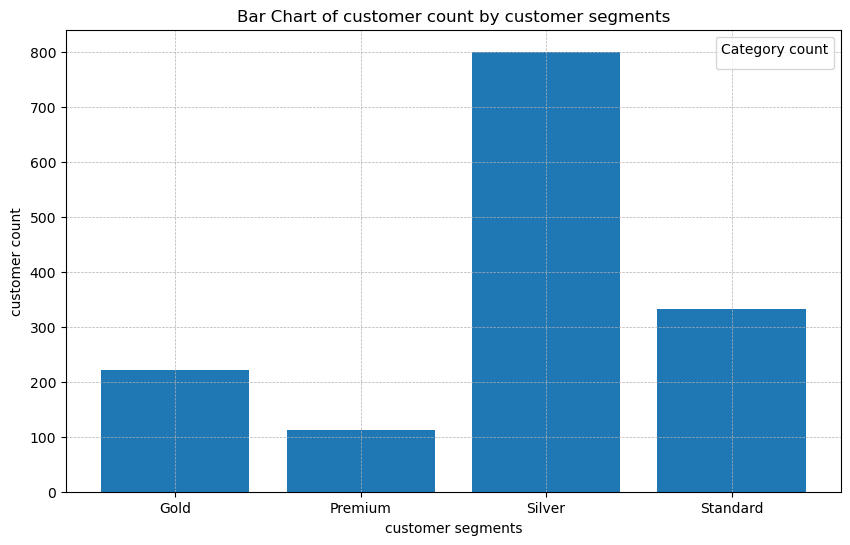

In [28]:
plt.figure(figsize=(10,6))
plt.bar(RFM_score_viz['customer_segments'],height=RFM_score_viz['customer_count'])
plt.xlabel('customer segments')
plt.ylabel('customer count')
plt.title('Bar Chart of customer count by customer segments')
plt.legend(title='Category count')
plt.xticks(RFM_score_viz['customer_segments'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
plt.show()


some strategies  we consider for each customer segment based on their RFM scores and customer segment:

Premium Customers (High RFM Scores):
Offer exclusive discounts or promotions: Provide special offers, discounts, or early access to new products/services to reward their loyalty and encourage repeat purchases.
VIP treatment: Provide personalized customer service, dedicated account managers, or priority support channels to enhance their overall experience.
Loyalty rewards: Implement a loyalty program with tiered rewards or points accumulation for every purchase made.
Gold Customers (High RFM Scores in Frequency and Monetary, Moderate Recency):
Personalized recommendations: Use customer data and purchase history to offer personalized product recommendations or curated collections tailored to their preferences.
Tiered discounts: Offer tiered discounts based on the frequency or amount of purchases made, providing incentives for them to increase their spending.
Early access to sales or new products: Give them exclusive access to sales events or new product launches before they are made available to the general public.
Silver Customers (Moderate RFM Scores in Frequency and Monetary, Moderate Recency) (We have highest number of customers from this category):
Targeted promotions: Send targeted email campaigns or promotions based on their past purchases or browsing behavior to encourage repeat purchases.
Cross-selling opportunities: Identify complementary products or accessories related to their past purchases and offer them as recommendations.
Referral incentives: Encourage them to refer friends or family members by offering incentives such as discounts or rewards for successful referrals.
Standard Customers (Low RFM Scores):
Re-engagement campaigns: Send targeted re-engagement emails or offers to win back customers who haven't made a purchase in a while.
Survey feedback: Gather feedback through surveys or feedback forms to understand their concerns or reasons for not purchasing frequently, and use this information to improve their experience.
Incentivize repeat purchases: Offer special discounts or promotions for their next purchase to encourage them to come back and shop again.